# Narrative Tales

<img src="https://drive.google.com/uc?id=1rJAKas1xJq5eI2JGnyztxP_ilFTqX2w4">



Welcome to the week 1 project for Building AI Products with OpenAI. In this  project, you are going to build a product that takes any PDF & converts it into a personlized podcast for you. Please read the [Objective](#scrollTo=rhyVqxv8xG1O) section to get more details.

The entire project is divided into the following steps:

1. [Setup](#scrollTo=v_eOnJmgjErX)
2. [Read PDF](#scrollTo=ft5r_4-Febft)
3. [Summarize PDF](#scrollTo=AHe2d8ProcHv)
4. [Generate Podcast Conversation](#scrollTo=cq4y4EsJn_9X)
5. [Deployment](#scrollTo=Hj5mKQTs48jj)
6. [Extensions](#scrollTo=BcZPOy5377DV)

<a href="https://colab.research.google.com/github/sidhusmart/CoRise_Prompt_Design_Course/blob/cohort3/Week_1/CoRise_Week1_StudentVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective

For many users, consuming information via an audio stream is more convenient than reading text. Many households are already familiar with using audio to access information on the Internet through virtual assistants and smart speakers. While they work well for information snippets and specific tasks ("Alexa, please play a lullaby!"), a conversational style is more effective in presenting information in an accessible and enjoyable way. This is why podcasts as a medium have become so popular.

But what if you wanted to listen to a podcast based on your current interest. Listening to a conversation about the Chola dynasty in 9th century CE India would be an absolute delight although something like this doesn't exist. What if you could create a podcast for the latest LLM research paper topic that you came across? What if it could also be personalized the way you like - maybe you are not into the details and prefer a summary. Maybe you would also be happy to hear some witty jokes during the conversation. Maybe you like to hear guests with a deep and calming voice. In this project, we will build a product that help you do just that!

# Setup

## Installing Project Dependencies
Run the cell below to import necessary Python libraries for our project!

In [2]:
## Setting up the necessary dependencies
!pip uninstall typing-extensions -y
!pip uninstall gradio -y
!pip install typing_extensions==4.7.1
!pip install gradio
!pip install feedparser
!pip install transformers accelerate
!pip install openai
!pip install tiktoken
!pip install pypdf
!pip install httpx==0.27.2

Found existing installation: typing_extensions 4.12.2
Uninstalling typing_extensions-4.12.2:
  Successfully uninstalled typing_extensions-4.12.2
Found existing installation: gradio 5.20.0
Uninstalling gradio-5.20.0:
  Successfully uninstalled gradio-5.20.0
  Using cached typing_extensions-4.7.1-py3-none-any.whl.metadata (3.1 kB)
Using cached typing_extensions-4.7.1-py3-none-any.whl (33 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastapi 0.115.11 requires typing-extensions>=4.8.0, but you have typing-extensions 4.7.1 which is incompatible.
altair 5.5.0 requires typing-extensions>=4.10.0; python_version < "3.14", but you have typing-extensions 4.7.1 which is incompatible.
torch 2.5.1+cu124 requires typing-extensions>=4.8.0, but you have typing-extensions 4.7.1 which is incompatible.
google-genai 1.2.0 requires typing-extensions<5.0.0dev,>=4.11.0, but you 

## Import PDF




As part of the setup, we are going to import the PDF to the Google colab files.

We work with PDFs using the [`pypdf`](https://pypi.org/project/pypdf/) library. Provide the link to the URL to load the PDF.
If you only have a local copy of the PDF, then you can upload it to the Colab environment as shown in the image below.

<img src="https://drive.google.com/uc?id=1aI59Qy4EfFXMNAcwqGWHwJcy3QdxMVm6" />

### 👨‍🏫 Learner Task:

Please adapt the following cell depending on the PDF document you are planning to use. You have the option of uploading a PDF file as shown above or load it from a URL.

In [10]:
import requests
import io
from pypdf import PdfReader, PageRange

# Replace the URL below with the specific PDF URL you want to use
# URL = "YOUR_PDF_SOURCE_URL"
# response = requests.get(URL)
# response.raise_for_status()
# remote_file_bytes = io.BytesIO(response.content)
# reader = PdfReader(remote_file_bytes)

# Uncomment the below line and provide the path to the local PDF file you want to use
reader = PdfReader("/content/AI_Healthcare.pdf")

# Listing the number of pages in the PDF file
number_of_pages = len(reader.pages)
print (number_of_pages)

9


Depending on the number of pages and structure of your PDF, you may choose to only use a section of it. You can adapt the following code if you would like to pick certain sections of the PDF.

In [11]:
# pages = PageRange('11:30').to_slice()
# selected_pages = reader.pages[pages]

# in case you want to use the entire document
selected_pages = reader.pages

input_text = ""
for page in selected_pages:
    input_text += page.extract_text() + "\n"

input_text

'1\nVol.:(0123456789)Scientific Reports |        (2024) 14:18994  | https://doi.org/10.1038/s41598-024-70073-7\nwww.nature.com/scientificreports\nInnovation and challenges \nof artificial intelligence technology \nin personalized healthcare\nYu‑Hao Li 2, Yu‑Lin Li 1, Mu‑Yang Wei 1 & Guang‑Yu Li 1*\nAs the burgeoning field of Artificial Intelligence (AI) continues to permeate the fabric of healthcare, \nparticularly in the realms of patient surveillance and telemedicine, a transformative era beckons. \nThis manuscript endeavors to unravel the intricacies of recent AI advancements and their profound \nimplications for reconceptualizing the delivery of medical care. Through the introduction of \ninnovative instruments such as virtual assistant chatbots, wearable monitoring devices, predictive \nanalytic models, personalized treatment regimens, and automated appointment systems, AI is not \nonly amplifying the quality of care but also empowering patients and fostering a more interactive \n

## Setting up OpenAI API Key

<div style="
  padding: 10px;
  border-radius: 5px;
  background-color: #ffcccc;
  border-left: 6px solid #ff0000;
  margin-bottom: 20px;">
  
  <strong>⚠️ Important Notice:</strong>
  <p>Do not share or use this API Key outside of the context of the notebook exercises.</p>
</div>


Uplimit has provisioned an OpenAI API Key for your projects. Please add this API Key to this assignment by clicking on the Security Key icon on the left hand tab of the Google Colab notebook and then add a new parameter value called `OPENAI_API_KEY`.


 Here you can provide the API key that you copied and this will not be part of your Google Colab account. You can also enable the toggle Notebook access - this will allow your notebook to have access to this API key.

<img src="https://drive.google.com/uc?id=1PXceUExMVUSLzkf9dh-w2Qo8d6hyEii0" />


After the API Key has been setup, run the following code:

In [12]:
from openai import OpenAI
from google.colab import userdata

# Guardrails also need access to the OpenAI_API_KEY and picks this up from an .env file
import os
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')

client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

# Read PDF


## Understanding Tokens & Context Window

When working with LLMs, you must remember that each model-type has a restricted **context window**. This is the amount of text that you can use in the prompt for that model-type. For e.g. `text-davinci-003` and `gpt-3.5-turbo` can accept a maximum input of 4096 tokens whereas newer models like `gpt-4` can take upto 32k and even 128k tokens. The pricing of requests to the OpenAI API is also based on the number of tokens, for e.g. `gpt-4o-mini` costs $0.150 /1M input tokens and 0.600 /1M output tokens.

###  What are tokens?

Tokens are the level at which these LLMs operate. They are trained to predict the next token in order to complete the sentence and so could be viewed as analogous to words. However, this is not completely accurate as tokens can also be parts of words. Let's use the `tiktoken` library from OpenAI to see how an example sentence would be tokenized and also use that to estimate the total number of tokens in our input text.

In [6]:
import tiktoken
enc = tiktoken.encoding_for_model("gpt-4o-mini")
token_list = enc.encode("Uplimit is amazing!")

In [7]:
token_list

[52, 528, 8082, 382, 8467, 0]

In [8]:
for token in token_list:
  print ("Token ", str(token), " decodes to ", enc.decode([token]))

Token  52  decodes to  U
Token  528  decodes to  pl
Token  8082  decodes to  imit
Token  382  decodes to   is
Token  8467  decodes to   amazing
Token  0  decodes to  !


So we can see that the way OpenAI tokenizes our text is not exactly analogous to words as the word - "Uplimit" has been tokenized into three tokens - "U", "pl" & "imit". The way that a model tokenizes our text impacts how many tokens and therefore the length of text that can be accepted in a single API request as well as the pricing -> more token, more the cost!

Let's determine the number of tokens in our text corpus.

In [13]:
## Please use the variable as pdf_input, wiki_input, or book_input based on your choice
print ("Number of tokens in corpus ", len(enc.encode(input_text)))

Number of tokens in corpus  11192


The number of tokens will depend on the type of PDF you chose. Books can be rather large, research papers will have much lesser number of tokens and news articles or reports will be the least.



We need to consider that in addition to the input text, we will also have to add the the Prompt that will provide instructions to the LLM. This is not considered a separate field and is counted towards the context window. Therefore, we need to find a way to deal with input texts that exceed the token limit.

What would happen if we do not handle these scenarios - it would result in the tokens at the end of our content being cut-off and not actually sent in the request to the LLM. Depending on the use-case this may or may not have critical implications.

We will design a series of steps that will split the input text into multiple chunks that satisfy the prompt limit. This also means that we will have to make multiple requests to the API and then collate all the responses after all responses have been received.

We will start by splitting the input text into logical sub-parts - sentences with the help of the NLTK library.

In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

def split_text (input_text):
  split_texts = sent_tokenize(input_text)
  return split_texts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Once the entire input text has been broken up into sentences we now join them up in such a way that we create chunks for each prompt. We keep adding sentences to a prompt chunk till we reach the max token length for that prompt. We set the max_token_len = 2000 in this case to ensure that we have enough spare room for our prompt instruction.

In [15]:
def create_chunks(split_sents, max_token_len=2000):
  current_token_len = 0
  input_chunks = []
  current_chunk = ""
  for sents in split_sents:
    sent_token_len = len(enc.encode(sents))
    if (current_token_len + sent_token_len) > max_token_len:
      input_chunks.append(current_chunk)
      current_chunk = ""
      current_token_len = 0
    current_chunk = current_chunk + sents
    current_token_len = current_token_len + sent_token_len
  if current_chunk != "":
    input_chunks.append(current_chunk)
  return input_chunks

You can try the splitting function on the input text that you have created to see what happens.

In [16]:
split_sents = split_text(input_text)
input_chunks = create_chunks(split_sents, max_token_len=2000)

In [17]:
len(input_chunks)

6

In [18]:
input_chunks

['1\nVol.:(0123456789)Scientific Reports |        (2024) 14:18994  | https://doi.org/10.1038/s41598-024-70073-7\nwww.nature.com/scientificreports\nInnovation and challenges \nof artificial intelligence technology \nin personalized healthcare\nYu‑Hao Li 2, Yu‑Lin Li 1, Mu‑Yang Wei 1 & Guang‑Yu Li 1*\nAs the burgeoning field of Artificial Intelligence (AI) continues to permeate the fabric of healthcare, \nparticularly in the realms of patient surveillance and telemedicine, a transformative era beckons.This manuscript endeavors to unravel the intricacies of recent AI advancements and their profound \nimplications for reconceptualizing the delivery of medical care.Through the introduction of \ninnovative instruments such as virtual assistant chatbots, wearable monitoring devices, predictive \nanalytic models, personalized treatment regimens, and automated appointment systems, AI is not \nonly amplifying the quality of care but also empowering patients and fostering a more interactive \ndyn

Identify how many chunks you have created and ensure that a chunk has not been trimmed at the middle of a sentence. We will move towards the next step of summarizing this information.

# Summarize PDF

In this section we will design a prompt for the LLM to take in the input text corpus and create a summary. We do this to identify the key highlights of the chosen topic so that we can subsequently generate the podcast script based on that.

Keep in mind that a generic summary will probably be too short and not have enough context to explore in a podcast discussion.

**Instructing chatGPT to create a summary from our source text corpus**

We are at the point where we have created chunks for our source text and now it's time to work with `gpt-4o-mini` model to generate the summary for our podcast. Please fill in the text prompt below:

- Keep in mind that you don't want just a regular summary - there should be enough information to create a podcast conversation
- Keep in mind that information is returned in a structured way so that you can easily parse and re-use for the next step

**HINT**: You can try and run your prompts first using the [chatGPT Web interface](https://chat.openai.com/) to see how it's working. This is manual because you will have to copy-paste the actual text information but you will save up on the cost of tokens compared to running it via the API.

### 👨‍🏫 Learner Task:

Please insert the prompt that you would like to use in the following cell.

In [65]:
instructPrompt = """
You are an AI expert working in the Healthcare industry.
Your task is to extract all important facts and details of the text to generate a comprehensive summary that will be used to create a postcast between two hosts.

This summary should cover:
- Introduction about the topic
- Explanation of the main applications and innovations that would be interesting to discuss
- Identification of the main challenges and concerns around this topic
- Recommendations for future research

The summary must be written in clear and professional English and well-formatted.
"""


In [57]:
# @title
instructPrompt = """
You are an AI expert working in the Healthcare industry.
Your task is to extract all important facts and details of the text to generate a comprehensive summary that will be used to create a postcast between two hosts.
The summary must be written in clear and professional English and formatted as a structured list of discussion points.
"""

In [66]:
requestMessages = []
for text in input_chunks:
  requestMessage = instructPrompt + '\n' + text
  requestMessages.append(requestMessage)

In [67]:
chatOutputs = []
for request in requestMessages:
  chatOutput = client.chat.completions.create(model="gpt-4o-mini",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": request}
                                                      ]
                                            )
  chatOutputs.append(chatOutput)

In [68]:
podcastFacts = ""
for chats in chatOutputs:
  podcastFacts = podcastFacts + chats.choices[0].message.content

In [69]:
podcastFacts

"# Summary: The Role of Artificial Intelligence in Personalized Healthcare\n\n## Introduction\nArtificial Intelligence (AI) is rapidly transforming the healthcare landscape, particularly through innovations in patient surveillance and telemedicine. This discussion focuses on the implications of recent AI advancements that are reshaping the delivery of medical care, underscoring both their potential to enhance patient experiences and the challenges they introduce.\n\n## Main Applications and Innovations\n1. **Virtual Assistant Chatbots**: \n   - These AI-driven tools offer 24/7 support, providing personalized medical advice and education based on individual patient needs. Utilizing Natural Language Processing (NLP) and machine learning, they can adapt to the language and style of users, enhancing engagement and patient compliance with treatment plans. Notable examples include platforms like Your.MD and Babylon Health.\n\n2. **Wearable Monitoring Devices**:\n   - From smartwatches to int

The above output should be a list of all important facts, themes or other highlights from your topic that you would like to be covered in the podcast conversation

# Generate Podcast Conversations



We have the key highlights/facts from the text corpus. We would like to weave a podcast conversation around this and generate a podcast script.

You can be as creative as you like and come up with various conversation styles that you would like to offer to customers. Here are some options that you can use when constructing your prompt -  
- Introduce the speakers - give them names (celebrities perhaps?)
- Would you like to assign a personality to your speakers? Include details when setting the context in your prompt
- Add some information to have a gentle introduction - maybe an ice-breaker?
- Then provide instructions for how the conversation should proceed - who asks the questions, how does the other speaker respond?
- Keep in mind that you will use this output in the next step to generate voices, so have a way to identify the different speakers in the conversation

We have included one example in this notebook already and provided additional examples of conversational styles in the course material as inspiration and look forward to seeing what other styles you come up with!

**Helpful Hints**

- In order to avoid using up a lot of your tokens it makes sense to start with only one chunk at a time and run experiments with your prompt. Once satisfied with the outcomes, then extend this to include all the chunks.
- Remember that in the next section, you are going to use a method to generate voices for the generated script. Therefore you should have a way to identify the speaker of each line of text so that you can generate the voice easily
- One of the possible ways to format the output of this section is as follows:

>Sid: Hey Darren, what are you drinking right now?
>
>Darren: Just some water. What about you?
>
>Sid: Oh, I've got a hot cup of coffee here. Can't function without it!
>
>Darren: Same here! So, what's new in the business world?

- Our recommendation would be to test this end to end for a small chunk of your podcast first before running it on a large corpus.

### 👨‍🏫 Learner Task:

Please add your podcast style prompts in each of the cells below:

In [70]:
podcast_prompt_style1 = """
Generate a script for a postcast between Andrew Ng (the host) and Michael Pfeffer (MD, chief information officer of Stanford Health Care).
The discussion should be centered on Innovation and challenges of artificial intelligence technology in personalized healthcare.
Format requirements:
- Begin the conversation by having the host, Andrew Ng, talk about what the postcast will be about.
- Have Andrew introduce Michael Pfeffer, who has come on to answer some questions.
- Andrew Ng asks well-structured questions that guide the conversation and Michael Pfeffer provides detailed explanations.
- Conclude with reflections on future developments and recommendations.
- In the script each speaker should speak on a separate line.

The tone should be professional with intellectual rigor and clear communication.
"""

In [75]:
podcast_prompt_style2 = """
Generate a friendly podcast conversation between Ruth (the host) and Jaime (the guest, an AI researcher in the University of Valencia).
The discussion should be centered on Innovation and challenges of artificial intelligence technology in personalized healthcare.
Format requirements:
- Begin the conversation by having the host, Ruth, talk about what the postcast will be about.
- Have Ruth introduce Jaime, who has come on to answer some questions.
- Have Ruth and Jaime engage in a Questions and Answer dialogue based on the text input.
- End with each speaker sharing one key takeaway and a friendly sign-off.
- In the script each speaker should speak on a separate line.

The conversation should flow naturally and should be engaging, and informative.
Ensure a good balance between technical depth and accessibility, making it suitable for beginners.
"""

In [76]:
podcast_prompt_style3 = """
Generate a script for a postcast between Ruth (the host) and Jaime (the guest, an AI researcher in the University of Valencia).
The discussion should be centered on Innovation and challenges of artificial intelligence technology in personalized healthcare.
Format requirements:
- Begin the conversation by having the host, Andrew Ng, talk about what the postcast will be about.
- Have Andrew introduce Michael Pfeffer, who has come on to answer some questions.
- Have Andrew and Michael engage in a Questions and Answer dialogue based on the text input.
- Use real-world examples to make concepts more understandable.
- In the script each speaker should speak on a separate line.
The target audience is first-year university students, so the conversation must attract their attention and be interesting and motivating.
Use friendly and motivating language, ensuring that listeners feel both educated and entertained.
"""

In [94]:
requestMessage = podcast_prompt_style3 + podcastFacts
requestMessage

"\nGenerate a script for a postcast between Ruth (the host) and Jaime (the guest, an AI researcher in the University of Valencia).\nThe discussion should be centered on Innovation and challenges of artificial intelligence technology in personalized healthcare.\nFormat requirements:\n- Begin the conversation by having the host, Andrew Ng, talk about what the postcast will be about. \n- Have Andrew introduce Michael Pfeffer, who has come on to answer some questions.\n- Have Andrew and Michael engage in a Questions and Answer dialogue based on the text input. \n- Use real-world examples to make concepts more understandable. \n- In the script each speaker should speak on a separate line.\nThe target audience is first-year university students, so the conversation must attract their attention and be interesting and motivating.\nUse friendly and motivating language, ensuring that listeners feel both educated and entertained.\n# Summary: The Role of Artificial Intelligence in Personalized Heal

In [95]:
finalOutput = client.chat.completions.create(model="gpt-4o-mini",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": requestMessage}
                                                      ],
                                            temperature = 0.2
                                            )

In [96]:
podcastScript = finalOutput.choices[0].message.content

In [88]:
print (podcastScript) #Style 1

**Podcast Script: Innovations and Challenges in AI-Driven Healthcare**

**[Intro Music Fades Out]**

**Andrew Ng:**  
Welcome to the podcast! I’m your host, Andrew Ng. Today, we’re diving into a fascinating and critical topic: the role of artificial intelligence in personalized healthcare. As AI continues to evolve, it brings both incredible opportunities and significant challenges, particularly in how we deliver personalized care to patients. 

To help us navigate this complex landscape, I’m thrilled to welcome our guest, Dr. Michael Pfeffer, the Chief Information Officer of Stanford Health Care. Dr. Pfeffer has extensive experience in integrating technology into healthcare systems, and he’s here to share his insights on the innovations and challenges we face with AI in personalized healthcare. Welcome, Michael!

**Michael Pfeffer:**  
Thank you, Andrew. It’s a pleasure to be here and discuss such an important topic.

**Andrew Ng:**  
Let’s start by discussing the current landscape of

In [80]:
print (podcastScript) #Style 2

**Ruth:** Welcome back to another episode of "Health Innovations Today"! I'm your host, Ruth, and today we’re diving into a fascinating topic: the role of artificial intelligence in personalized healthcare. AI is rapidly transforming how we approach patient care, but with innovation comes a set of challenges that we need to navigate carefully. 

**Ruth:** To help us unpack this topic, I’m thrilled to introduce our guest, Jaime, an AI researcher from the University of Valencia. Jaime, thank you for joining us today!

**Jaime:** Thank you for having me, Ruth! I’m excited to be here and discuss the intersection of AI and healthcare.

**Ruth:** Great! Let’s start with the basics. How is AI currently being used in personalized healthcare?

**Jaime:** AI is making waves in several areas. For instance, we have virtual assistant chatbots that provide 24/7 support to patients, offering personalized medical advice based on their individual needs. These tools use natural language processing to en

In [97]:
print (podcastScript) #Style 3

**Podcast Script: Innovations and Challenges of AI in Personalized Healthcare**

**Ruth (Host):**  
Welcome to today's episode of "Health Tech Talks"! I'm your host, Ruth, and today we're diving into a fascinating topic: the role of artificial intelligence in personalized healthcare. AI is revolutionizing how we approach patient care, from virtual assistants to wearable devices, but it also brings a set of challenges that we need to address. 

**Ruth:**  
I'm thrilled to introduce our guest today, Jaime, an AI researcher from the University of Valencia. Jaime, thank you for joining us!

**Jaime (Guest):**  
Thank you for having me, Ruth! I'm excited to discuss how AI is shaping the future of healthcare and the challenges we face along the way.

**Ruth:**  
Absolutely! Let’s start with the basics. Jaime, can you explain how AI is currently being used in personalized healthcare?

**Jaime:**  
Sure! One of the most exciting applications is the use of virtual assistant chatbots. For instan

Check the output script that your prompt generated and make necessary changes if required. Prompt design is iterative in nature and don't be shy to explore different styles.


Since November 2023, OpenAI offers a voice generation API although there are only 6 voices at the moment and the voice generation works best for English although others are also supported. We will use this API to keep things simple but do look for the Extensions at the end of the notebook where we provide additional information on using ElevenLabs - where you will be able to select from a large variety of speakers and even train your own!

In order to perform the voice generation, we use the following two methods. The `openai_generation` function makes the call to the API to generate voice from a piece of text. The `createPodcast` function takes as input the podcastScript and makes necessary adjustment of speaker names and selected voices to generate and stitch together the complete podcast.

This function assumes that each line of the input text is spoken by a different person and the person's name is also part of the text itself. Please ensure that the prompt and outputs of the podcast script (generated in the previous step) fits this style.

In [89]:
def openai_generation(input_text, speaker_voice, model_choice="tts-1"):
  client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))
  response = client.audio.speech.create(
      model=model_choice,
      voice=speaker_voice,
      input=input_text
  )
  return response.read()

In [90]:
def createPodcast(podcastScript, speakerName1, speakerChoice1, speakerName2, speakerChoice2):
  genPodcast = []
  podcastLines = podcastScript.split('\n\n')
  podcastLineNumber = 0
  for line in podcastLines:
    if podcastLineNumber % 2 == 0:
      speakerChoice = speakerChoice1
      line = line.replace(speakerName1+":", '')
    else:
      speakerChoice = speakerChoice2
      line = line.replace(speakerName2+":", '')
    genVoice = openai_generation(input_text=line, speaker_voice=speakerChoice, model_choice="tts-1")
    genPodcast.append(genVoice)
    podcastLineNumber += 1
  return genPodcast

OpenAI currently only supports six speaker voices and you can choose the type of voice that you would like by listening to some of the samples [here](https://platform.openai.com/docs/guides/text-to-speech/voice-options).

Once you have selected the speaker voices then please make changes below to specify the name of the speakers you chose while generating the podcast script. This will ensure those names are actually removed before the dialogue is spoken!

### 👨‍🏫 Learner Task:

Please make necessary changes to the function below to replace it with your choice of speaker voices from OpenAI. In addition, you will also need to replace the names of the speakers based on what you chose in the podcast generation step previously.

In [98]:
speakerName1 = "Ruth"
speakerChoice1 = "coral"
speakerName2 = "Jaime"
speakerChoice2 = "onyx"
genPodcast = createPodcast(podcastScript, speakerName1, speakerChoice1, speakerName2, speakerChoice2)

In [99]:
with open("/content/genPodcast.mp3", "wb") as f:
  for pod in genPodcast:
    f.write(pod)

In [100]:
import IPython
IPython.display.Audio("/content/genPodcast.mp3")

Output hidden; open in https://colab.research.google.com to view.

With the previous step, you will find the generated podcast available in the folder section on the left bar of Google Colab (refer to the screenshot where you uploaded the PDF file).

# Deployment

## Encapsulating features into functions

We put all the functionality that we have developed till now into easy to use functions. To simplify things, we read all the pages of the PDF as opposed to the selected pages examples that we showed in Section 1.

Feel free to modify the functions as necessary to suit the product you want to build. Also take a look at the Extensions section where we present additional ideas and code examples for dealing with other data sources.

In [101]:
import os
from openai import OpenAI
import tiktoken

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

from pypdf import PdfReader, PageRange

## Function to read the uploaded PDF
def read_data_from_PDF(input_path):
  input_text = ''
  print ('Reading PDF from path', input_path)
  reader = PdfReader(input_path)
  number_of_pages = len(reader.pages)
  print ('PDF has been read with ', number_of_pages, ' pages')
  for page in reader.pages:
    input_text += page.extract_text() + "\n"
  return input_text


## Function to split the text into sentences
def split_text (input_text):
  split_texts = sent_tokenize(input_text)
  return split_texts


## Function to create chunks while considering sentences
def create_chunks(split_sents, max_token_len=50):
  enc = tiktoken.encoding_for_model("gpt-4o-mini")
  current_token_len = 0
  input_chunks = []
  current_chunk = ""
  for sents in split_sents:
    sent_token_len = len(enc.encode(sents))
    if (current_token_len + sent_token_len) > max_token_len:
      input_chunks.append(current_chunk)
      current_chunk = ""
      current_token_len = 0
    current_chunk = current_chunk + sents
    current_token_len = current_token_len + sent_token_len
  if current_chunk != "":
    input_chunks.append(current_chunk)
  return input_chunks


## Function to create chunks
def create_input_chunks(input_text):
  split_sents = split_text(input_text)
  input_chunks = create_chunks(split_sents, max_token_len=3000)
  return input_chunks


## Function to create summary of the given input text
def create_summary_points(input_chunks):
  client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))
  instructPrompt = """
                  You are provided with a piece of text regarding a subject. Please identify the key facts and highlights about this piece of text.
                  Please provide the output in the form of a list something like -

                  - Highlight 1
                  - Highlight 2
                  - Highlight 3
                  """
  podcastFacts = []
  for text in input_chunks:
    request = instructPrompt + '\n' + text
    chatOutput = client.chat.completions.create(model="gpt-4o-mini",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": request}
                                                      ]
                                            )
    podcastFacts.append(chatOutput.choices[0].message.content)
  return "\n".join(podcastFacts)


## Two different prompt styles for the podcast conversation
informative_podcast_prompt = """
Generate a friendly podcast conversation between Ruth (the host) and Jaime (the guest, an AI researcher in the University of Valencia).
The discussion should be centered on Innovation and challenges of artificial intelligence technology in personalized healthcare.
Format requirements:
- Begin the conversation by having the host, Ruth, talk about what the postcast will be about.
- Have Ruth introduce Jaime, who has come on to answer some questions.
- Have Ruth and Jaime engage in a Questions and Answer dialogue based on the text input.
- End with each speaker sharing one key takeaway and a friendly sign-off.
- Format each line of dialogue as: "Ruth: [text]" or "Jaime: [text]"

The conversation should flow naturally and should be engaging, and informative.
Ensure a good balance between technical depth and accessibility, making it suitable for beginners.
"""

informal_podcast_prompt = """
Generate a script for a postcast between Ruth (the host) and Jaime (the guest, an AI researcher in the University of Valencia).
The discussion should be centered on Innovation and challenges of artificial intelligence technology in personalized healthcare.
Format requirements:
- Begin the conversation by having the host, Andrew Ng, talk about what the postcast will be about.
- Have Andrew introduce Michael Pfeffer, who has come on to answer some questions.
- Have Andrew and Michael engage in a Questions and Answer dialogue based on the text input.
- Use real-world examples to make concepts more understandable.
- Format each line of dialogue as: "Ruth: [text]" or "Jaime: [text]"
The target audience is first-year university students, so the conversation must attract their attention and be interesting and motivating.
Use friendly and motivating language, ensuring that listeners feel both educated and entertained.
"""

styles = {'informative':informative_podcast_prompt,
          'informal': informal_podcast_prompt}


## Function to create the podcast script
def create_podcast_script(podcast_points, output_style):
  client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))
  instructPrompt = styles[output_style]
  request = instructPrompt + '\n' + podcast_points
  chatOutput = client.chat.completions.create(model="gpt-4o-mini",
                                            messages=[{"role": "system", "content": "You are a helpful assistant."},
                                                      {"role": "user", "content": request}
                                                      ]
                                            )
  return chatOutput.choices[0].message.content


## Function to call all the podcast script generation steps
def create_podcast(input_path, output_style):
  input_text = read_data_from_PDF(input_path)
  input_chunks = create_input_chunks(input_text)
  podcastHighlights = create_summary_points(input_chunks)
  podcastScript = create_podcast_script(podcastHighlights, output_style)
  return podcastScript


## Function to generate speech from input text
def openai_generation(input_text, speaker_voice, model_choice="tts-1"):
  client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))
  response = client.audio.speech.create(
      model=model_choice,
      voice=speaker_voice,
      input=input_text
  )
  return response.read()


## Function to generate complete audio podcast from script
## NOTE: this function assumes that there are only two speakers; please modify if you have multiple speakers in the script
def create_podcast_audio(podcastScript, speakerName1="Ruth", speakerChoice1='coral', speakerName2="Jaime", speakerChoice2='onyx'):
  genPodcast = []
  podcastLines = podcastScript.split('\n\n')
  podcastLineNumber = 0
  for line in podcastLines:
    if podcastLineNumber % 2 == 0:
      speakerChoice = speakerChoice1
      line = line.replace(speakerName1+":", '')
    else:
      speakerChoice = speakerChoice2
      line = line.replace(speakerName2+":", '')
    genVoice = openai_generation(input_text=line, speaker_voice=speakerChoice, model_choice="tts-1")
    genPodcast.append(genVoice)
    podcastLineNumber += 1
  with open("genPodcast.mp3", "wb") as f:
    for pod in genPodcast:
      f.write(pod)
  return "genPodcast.mp3"

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Creating a front-end application to host the app

We will create a front-end application with Gradio that allows any user to interact with our product. We have chosen to go with a basic UI experience but the idea is to show the power of the product.

When you run the code below, the Gradio front-end will be loaded and running in the notebook environment but also generate a URL that you can share with anyone who wants to use the app!

In [ ]:
import gradio as gr

css = """
h1 {
    text-align: center;
    display:block;
}
"""

def upload_file(file):
    return file.name

with gr.Blocks(title="Narrative Tales", css=css) as demo:
    gr.Markdown("# Welcome to Narrative Tales")
    file_output = gr.File()
    upload_button = gr.UploadButton("Click to Upload a PDF", file_types=[".pdf"], file_count="single")
    upload_button.upload(upload_file, upload_button, file_output)
    podcast_style = gr.Dropdown(styles.keys(), label="podcast_style")
    generate_podcast_button = gr.Button("Generate Podcast Script")
    podcast_script = gr.Textbox(interactive=True, label="podcast_script")

    generate_podcast_button.click(fn=create_podcast, inputs=[file_output, podcast_style], outputs=podcast_script, api_name="generate_podcast_script")

    generate_audio_button = gr.Button("Generate Audio Version")
    podcast_audio = gr.Audio(label="podcast_audio", interactive=False, type="filepath")
    generate_audio_button.click(fn=create_podcast_audio, inputs=podcast_script, outputs=podcast_audio, api_name="generate_podcast_audio")

demo.launch(debug=True, share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://fea71b4be24e3f4941.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Reading PDF from path /tmp/gradio/a5312dedd8c70be45482ee6646e4ad3de683f2e937ece04474f42f68f26d05d4/AI_Healthcare.pdf
PDF has been read with  9  pages


# [Optional] Extensions

## Feature idea: Allow listeners to ask questions after listening to the podcast!

Many a times after listeners have heard the podcast, they may have follow-up questions on the topic. It would be a great feature to allow listeners to have a conversation with the podcast hosts who can help them understand the topic further by answering questions.

We can enable this feature as the GPT-4o (not mini) model is capable of taking in both audio and text prompts and respond with audio directly. Below you find an implemention of such a feature.

In order to send in audio messages to the GPT-4o model, we have to pass it as a `base64` encoded string. Compared to simply sending in the text prompt as we did before, now we have to perform some additional processing steps in order to convert the incoming audio message into a WAV file first and then convert this to a base64-encoded string. The steps are as follows:

1. We will read in the audio message from the microphone or an MP3 file using the Gradio front-end library.
2. The Gradio components provide the audio file as a numpy ndarray and we convert it to the WAV format.
3. From the WAV format, we use the `base64` library to encode it into a string which we can pass in the API call along with the text prompts.

In [ ]:
import gradio as gr
import numpy as np
import base64
import requests
import io
from scipy.io import wavfile
import soundfile as sf

def process_audio(audio):
    # audio input comes as a tuple of (sample_rate, audio_data)
    sample_rate, audio_data = audio

    # Convert to WAV format using an in-memory buffer
    wav_buffer = io.BytesIO()
    wavfile.write(wav_buffer, sample_rate, audio_data)
    wav_buffer.seek(0)

    # Encode the WAV file to base64
    base64_audio = base64.b64encode(wav_buffer.read()).decode('utf-8')

    try:
        # Make the API call
        completion = client.chat.completions.create(
                                      model="gpt-4o-audio-preview",
                                      modalities=["text", "audio"],
                                      audio={"voice": "alloy", "format": "wav"},
                                      messages=[
                                          {
                                              "role": "system",
                                              "content": "You are a podcast host who patiently answers listener questions."

                                          },
                                          {
                                              "role": "user",
                                              "content": [
                                                  {
                                                      "type": "text",
                                                      "text": "One of your listeners just heard your podcast and asked a question in the attached audio file. Please listen to the audio in the file, then repeat the question for other listeners, and then answer it based on the podcast facts that are presented here." + podcastFacts
                                                  },
                                                  {
                                                      "type": "input_audio",
                                                      "input_audio": {
                                                          "data": base64_audio,
                                                          "format": "wav"
                                                      }
                                                  }
                                              ]
                                          },
                                      ]
                                    )

        # Get the base64 encoded response
        processed_base64 = completion.choices[0].message.audio.data

        # Decode base64 to WAV
        wav_bytes = base64.b64decode(processed_base64)
        audio_buffer = io.BytesIO(wav_bytes)

        # Read the processed audio using soundfile
        audio_buffer.seek(0)
        processed_audio, sample_rate = sf.read(audio_buffer)

        return (sample_rate, processed_audio)

    except requests.exceptions.RequestException as e:
        raise gr.Error(f"API Error: {str(e)}")
    except Exception as e:
        raise gr.Error(f"Processing Error: {str(e)}")

The above function takes care of all the steps that we listed previously. We will not create the Gradio interface which can be used by the listener to ask questions - either directly into the microphone or via uploading an MP3 file.

In [ ]:
audio_chat = gr.Interface(
    fn=process_audio,
    inputs=gr.Audio(type="numpy", label="Input Audio"),
    outputs=gr.Audio(type="numpy", label="Processed Audio"),
    title="Audio Chat with Narrative Tales",
    description="Feel free to ask your question directly or upload an MP3 file and our podcast hosts will be happy to reply."
)

# Launch the app
audio_chat.launch()

## Running a Local LLM

In this section, we present an alternative LLM option that can run locally. This will obviously have longer processing times but you will not be charged credits for using an API. Please note that this approach is experimental and will be more variable in terms of quality of output and speed. The libraries and tools are experimental in nature and can change at short notice. Our recommendation would be to stick with the default options presented above for a simple approach.

But we do present these options that you can run for free within a Colab notebook. This is an alternative way of completing the project for those who have run out of credits on OpenAI or do not want to attach a credit card for any reason.

**LLAMA-CPP**

In order to run a local LLM, we will make use of the [Llama-CPP-Python](https://github.com/abetlen/llama-cpp-python) package. In addition to OpenAI and Claude that are closed source models accecible only through an API, there are several open-source language models that are primarily derived from [LLAMA-2](https://llama.meta.com/) (from Meta) or [Mistral](https://mistral.ai/news/announcing-mistral-7b/). Since they are open-source, the community has fine-tuned on multiple datasets and created several versions that serve various purposes.

These models come in different sizes starting from a 7 Billion parmaeter model going upto 70 billion parameters. Even still, they are quite large and take up quite some GPU RAM when loaded. As a result, there is an initiative to quantize these models and provide them in C++ binaries that are much smaller in size and can easily fit into memory. On the other hand, they do loose some quality and can still take long to generate responses.

We start by installing the llama-cpp-python library with some additional options that make sure that we are using the GPU version that can leverage the T4 GPU available for free on Google Colab.

In [ ]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python

Most of the quantized models are made available by a handle called [TheBloke](https://huggingface.co/TheBloke) on HuggingFace. They are available in multiple quantized format and we will not go into depth but suffice to say that we choose a version that can be loaded in memory and produces reasonable output.

For our project, we would recommend running the WizardLM-13B model that is currently rated high in the OpenLLM Chatbot [leaderboard](https://huggingface.co/spaces/lmsys/chatbot-arena-leaderboard). The code below downloads the WizardLM 13 Billion parameter model and stores it within the Google Colab directory.

In [ ]:
from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="TheBloke/WizardLM-13B-V1.2-GGUF", filename="wizardlm-13b-v1.2.Q4_K_S.gguf", local_dir='/content')

In the following step, we are loading the downloaded model into GPU memory and setup some parameters like the context window, temperature etc. You can vary these based on your preferences but we have provided the recommended defaults.

In [ ]:
from llama_cpp import Llama
n_gpu_layers = 40 # Change this value based on your model and your GPU VRAM pool.
llm = Llama(model_path="/content/wizardlm-13b-v1.2.Q4_K_S.gguf",
            temperature=0.75,
            max_tokens=6000,
            top_p=1,
            verbose=True,
            n_gpu_layers=n_gpu_layers,
            n_ctx=6000
)

The great thing about the llama-cpp-python library is that it provides very similar APIs to those provided by OpenAI. So the code for actually making the LLM call, should look very familiar to the original example provided above. The only change we make is to take only a part of the transcript since the context window of the local LLM is not as large as the 128k context window provided by gpt-4o-mini.

## Deploy to HuggingFace

Deploy your product to HuggingFace and provide users with a way to use the app! The Gradio app that you created above will be valid as long as the Colab notebook us running. But it's a very easy step to deploy this to HuggingFace by creating your own Space.

- Create an account and sign-in to HuggingFace
- Then navigate to the Spaces tab and click on Create New Space
- You can provide the name of the app you would like to create, choose Gradio as the Space SDK and select whether you want to keep the app Private/Public
- On the next page, you can select the create the `app.py` file directly in the browser which should open up an editor window directly in the browser
- Now you need to copy-paste the code from the last two cells into app.py. The first cell contains all the encapsulated functions and the second cell contains the definition of the gradio app
- Once you've commited this change, your app will be built and available to be used by anyone!

<img src="https://drive.google.com/uc?id=1vHRbLEijzsO3TZY0FpJPEVYuu2HP_uwR">

## Using ElevenLabs for voice generation

You can choose to perform the voice generation using voices from 11Labs (11.ai). They are a startup that provide a large variety of realistic voices with the right intonation while speaking. They also offer the possibility to train your own voice using the Studio/Web version but you can choose from the multiple options available to start with.

In order to sign-up, please visit this [link](https://beta.elevenlabs.io/) and create an account. Every new account receives free credits to run voice generations for upto 10k words which should fit well for the purposes of this project. Once the sign-up is complete, please click on the Account name and `Profile` tab from where you can copy the API key.

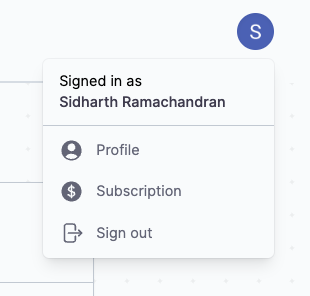

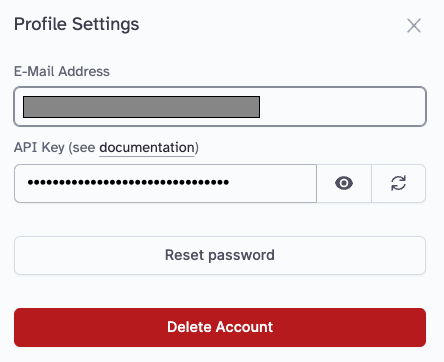

In [ ]:
!pip install elevenlabs

In [ ]:
from elevenlabs import set_api_key

set_api_key(getpass('ELEVEN_LABS_API_KEY'))

You can select from a list of speakers that are offered by Eleven Labs as listed [here](https://beta.elevenlabs.io/) in their demo dropdown. Hit the play button to hear the voice and choose a speaker that appeals to you!

In order to perform the voice generation, you can use the method below. This assumes that each line of the input text is spoken by a different person and the person's name is also part of the text itself. Please ensure that the output of your podcast script fits this style or else feel free to adjust the method.

Once you have selected the speaker voices then please make changes below to specify the name of the speakers you chose while generating the podcast script. This will ensure those names are actually removed before the dialogue is spoken!

In [ ]:
from elevenlabs import generate

def createPodcast(podcastScript, speakerName1, speakerChoice1, speakerName2, speakerChoice2):
  genPodcast = []
  podcastLines = podcastScript.split('\n\n')
  podcastLineNumber = 0
  for line in podcastLines:
    if podcastLineNumber % 2 == 0:
      speakerChoice = speakerChoice1
      line = line.replace(speakerName1+":", '')
    else:
      speakerChoice = speakerChoice2
      line = line.replace(speakerName2+":", '')
    genVoice = generate(text=line, voice=speakerChoice, model="eleven_monolingual_v1")
    genPodcast.append(genVoice)
    podcastLineNumber += 1
  return genPodcast

In [ ]:
speakerName1 = "YOUR_SPEAKER_ONE_NAME"
speakerChoice1 = "SPEAKER_ONE_VOICE"
speakerName2 = "YOUR_SPEAKER_TWO_NAME"
speakerChoice2 = "SPEAKER_TWO_VOICE"
genPodcast = createPodcast(podcastScript, speakerName1, speakerChoice1, speakerName2, speakerChoice2)

In [ ]:
with open("/content/sample_data/genPodcast.mpeg", "wb") as f:
  for pod in genPodcast:
    f.write(pod)

With the previous step, you will find the generated podcast available in the folder section on the left bar of Google Colab (refer to the screenshot where you uploaded the PDF file).
All your generated recordings are also available on https://beta.elevenlabs.io/history but this can be a bit buggy at times so I would highly recommend that you save and download your generated audio file as well.

## Multiple Data Sources

In the project we only used PDFs as our data source. But in general, the app could offer users the ability to provide multiple types of data like public URLs, Word documents, Wikipedia etc. We provide code below for working with Wikipedia and generic text documents from a book corpus.

### Wikipedia

In [ ]:
!pip install wikipedia

Let's confirm we can extract the content using Wikipedia's page about itself!

In [ ]:
import wikipedia
print (wikipedia.summary("Wikipedia"))

In [ ]:
# Replace the Wiki page below with the name of the Wiki page you would like to use
input = wikipedia.page("YOUR_WIKI_PAGE_HERE", auto_suggest=False)

In [ ]:
wiki_input = input.content
wiki_input

### Generic Text File

In order to provide an even more generic option, we consider loading information of a book from Project Gutenberg which is available in the form of a text file. This can easily cover almost any other text based source of knowledge.

Please replace the book of your choice by browsing through the Porject Gutenberg library.

In [ ]:
import requests

def get_gutenberg_text(url):
    response = requests.get(url)
    response.encoding = 'utf-8'
    raw_text = response.text

    start_delimiter = "*** START OF THE PROJECT GUTENBERG EBOOK"
    end_delimiter = "*** END OF THE PROJECT GUTENBERG EBOOK"

    start_index = raw_text.find(start_delimiter)
    end_index = raw_text.find(end_delimiter)

    if start_index == -1 or end_index == -1:
        raise ValueError("Could not find start or end delimiter in the text.")

    start_index = raw_text.find("\n", start_index) + 1
    end_index = raw_text.rfind("\n", 0, end_index)

    return raw_text[start_index:end_index]

In [ ]:
# Replace the URL below with the specific Project Gutenberg book URL you want to read
book_url = "YOUR_BOOK_OF_CHOICE"
book_input = get_gutenberg_text(book_url)

print(book_input[:500])  # Print the first 500 characters of the book